In [1]:
import os, config, pickle, nbimporter, random, _1_extract, numpy as np, pandas as pd, matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider, FloatSlider, fixed, Dropdown
from IPython.display import display
from scipy.stats import linregress
Species, Data = _1_extract.Species, _1_extract.Data

Importing Jupyter notebook from _1_extract.ipynb


In [2]:
result_dict = {'slope': 0, 'intercept': 1, 'rvalue': 2, 'pvalue': 3, 'stderr': 4}

# Analysis

In [3]:
SPECIES = config.load_pickle(os.path.join(config.OUTPUT_DIR, 'species_processed.pkl'))

In [26]:
r_0a, r_0b, r_0 = [], [], [] 
d_x, d_y = [], []
T_c, T_g = [], []
for s in SPECIES:
    for data in SPECIES[s].data:
        r_0a.append(data.approximations['r_0a'])
        r_0b.append(data.approximations['r_0b'])
        r_0.append(data.eigen['r_i'][0])
        d_x.append(data.approximations['d'])
        d_y.append(data.eigen['damping'])
#         T_c.append(data.derivatives['T_c'])
#         T_g.append(data.derivatives['T_g'])
r_0 = np.array(r_0)
r_0a = np.array(r_0a)
r_0b = np.array(r_0b)
d_x = np.array(d_x)
d_y = np.array(d_y)
ix = np.where((r_0 <.4) * (r_0 > -.4))
r_0a_lr = linregress(r_0a[ix], r_0[ix])
# r_0b_lr = linregress(r_0b[ix], r_0[ix])

In [28]:
r_0[ix]

array([ 1.66481799e-04, -2.06343886e-04,  1.45661160e-03, -2.51278145e-02,
       -1.24516059e-03, -3.23970079e-03, -9.03195887e-03, -7.86184991e-04,
       -1.28296294e-02,  1.28609715e-04, -5.48389648e-02, -7.06941198e-02,
       -1.61917493e-02,  6.02100757e-04,  3.88081636e-02,  7.73229782e-03,
        2.47485098e-04,  1.41077033e-02,  6.32612087e-02, -2.99367255e-01,
        1.96062708e-01,  2.55912626e-01,  2.20742567e-02,  9.26317108e-02,
       -9.14775050e-03,  2.35927258e-03, -3.19588957e-02,  6.68722620e-02,
        1.92199354e-02,  4.31231914e-02,  9.02467827e-02,  4.31856781e-02,
        1.83822927e-01,  6.14337708e-02,  5.41338387e-02, -4.60510017e-04,
       -9.98986885e-02, -5.69835496e-02, -1.17426621e-01,  3.97249093e-03,
       -1.17929996e-01,  5.22922680e-02, -7.94905601e-02, -2.75055158e-02,
        2.63591898e-02,  1.81716932e-03,  1.78724481e-02,  1.09164053e-01,
        1.80184907e-02,  9.48129594e-02, -4.08858556e-02, -1.03127954e-02,
       -1.46777988e-01, -

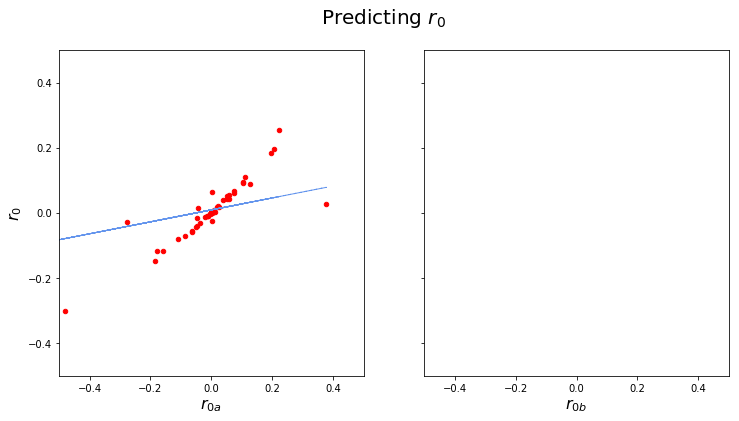

In [30]:
step = .50
fig,ax = plt.subplots(1,2,sharex=False,sharey=True,figsize=(12, 6))
fig.suptitle('Predicting $r_0$', fontsize=20)
ax[0].set_xlabel('$r_{0a}$', fontsize=16)
ax[1].set_xlabel('$r_{0b}$', fontsize=16)
ax[0].set_ylabel('$r_0$', fontsize = 16)
ax[0].set_ylim([0-step, 0+step])
ax[0].set_xlim([0-step, 0+step])
ax[1].set_xlim([0-step, 0+step])
ax[0].plot(r_0a[ix], r_0a[ix] * r_0a_lr[0] + r_0a_lr[1], color='cornflowerblue', ls='--', linewidth=1)
# ax[1].plot(np.arange(-1, 1, .1), np.arange(-1, 1, .1), color='cornflowerblue', ls='--', linewidth=1)
ax[0].scatter(r_0a[ix], r_0[ix], s=20, color='red')
# ax[1].scatter(r_0b, r_0, s=20, color='red')

In [25]:
slope, intercept, rvalue

(0.17792287309584828, 0.00922501004152333, 0.7073901077879756)

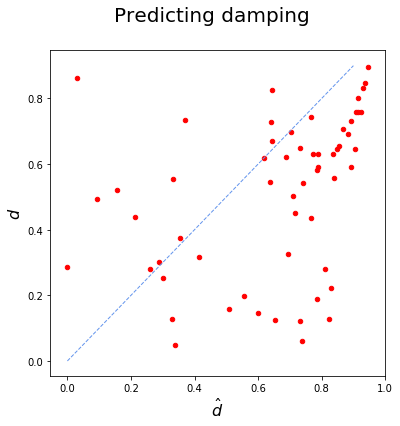

In [150]:
step = .50
fig2,ax2 = plt.subplots(1,1,sharex=False,sharey=False,figsize=(6, 6))
fig2.suptitle('Predicting damping', fontsize=20)
ax2.set_xlabel('$\hat{d}$', fontsize=16)
ax2.set_ylabel('$d$', fontsize = 16)
ax2.plot(np.arange(0, 1, .1), np.arange(0, 1, .1), color='cornflowerblue', ls='--', linewidth=1)
ax2.scatter(d_x, d_y, s=20, color='red')

In [69]:
# def f(species, data, interact=False):
#     if interact:
#         display(species.data[data])
#     return species
# species_dropdown = Dropdown(options=SPECIES)
# data_slider = IntSlider(min=0, max=len(species_dropdown.value.data)-1, step=1, value=0)
# def update_data_range(*args):
#     data_slider.max = len(species_dropdown.value.data) - 1
# species_dropdown.observe(update_data_range, 'value')
# w = interactive(f, species=species_dropdown, data=data_slider,  interact=fixed(True))
# data_slider